<a href="https://colab.research.google.com/github/sipocz/XLS_Conv/blob/main/XLS_converter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [258]:
import pandas as pd
import os

In [259]:
!rm *.xlsx

In [260]:
urlname="https://github.com/sipocz/XLS_Conv/raw/e052e5c75f5690d62793dc2f31af7d22b564e405/U113_20210705.xlsx"
urlname="https://github.com/sipocz/XLS_Conv/raw/e052e5c75f5690d62793dc2f31af7d22b564e405/U113_20210628.xlsx"
urlname="https://github.com/sipocz/XLS_Conv/raw/e052e5c75f5690d62793dc2f31af7d22b564e405/U113_20210621.xlsx"
urlname="https://github.com/sipocz/XLS_Conv/raw/e052e5c75f5690d62793dc2f31af7d22b564e405/U113_20210614.xlsx"
urlname="https://github.com/sipocz/XLS_Conv/raw/e052e5c75f5690d62793dc2f31af7d22b564e405/U113_20210607.xlsx"
urlname="https://github.com/sipocz/XLS_Conv/raw/e409cb38b2f6f8528aff37e0b9712ea9f64f32c4/U113_20210531.xlsx"
#urlname="https://github.com/sipocz/XLS_Conv/raw/e409cb38b2f6f8528aff37e0b9712ea9f64f32c4/U113_20210517.xlsx"
#urlname="https://github.com/sipocz/XLS_Conv/raw/e409cb38b2f6f8528aff37e0b9712ea9f64f32c4/U113_20210510.xlsx"
#urlname="https://github.com/sipocz/XLS_Conv/raw/e409cb38b2f6f8528aff37e0b9712ea9f64f32c4/U113_20210503.xlsx"



_,fname= os.path.split(urlname)

In [261]:
!wget $urlname

--2021-10-02 09:55:45--  https://github.com/sipocz/XLS_Conv/raw/e409cb38b2f6f8528aff37e0b9712ea9f64f32c4/U113_20210531.xlsx
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/sipocz/XLS_Conv/e409cb38b2f6f8528aff37e0b9712ea9f64f32c4/U113_20210531.xlsx [following]
--2021-10-02 09:55:46--  https://raw.githubusercontent.com/sipocz/XLS_Conv/e409cb38b2f6f8528aff37e0b9712ea9f64f32c4/U113_20210531.xlsx
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5795058 (5.5M) [application/octet-stream]
Saving to: ‘U113_20210531.xlsx’

U113_20210531.xlsx  100%[===================>]   5.53M  --.-KB/s    in 0.04s   

202

In [262]:
df=pd.read_excel(fname,sheet_name=3)

In [263]:
df.columns=["Date","Value","Status"]

In [264]:
df.tail()

,Date,Value,Status
29468,2021-06-04 23:58:52,45.029373,OK
29469,2021-06-04 23:59:12,45.029373,OK
29470,2021-06-04 23:59:32,45.117111,OK
29471,2021-06-04 23:59:52,45.117111,OK
29472,True,NaN,NaN


In [265]:
df.dropna(inplace=True)

In [266]:
df.Date[0]

datetime.datetime(2021, 5, 31, 0, 0, 33)

In [267]:
#pd.to_datetime(df.Date, format="%Y-%m-%d %H:%M:%S")

In [268]:
df.index=df.Date

In [269]:
df.describe()

,Value
count,29472.000000
mean,53.445896
std,23.377427
min,-50.000000
25%,57.713432
50%,59.777222
75%,64.946213
max,100.762955


In [270]:
df.Date.values[-1]

datetime.datetime(2021, 6, 4, 23, 59, 52)

In [271]:
new_range = pd.date_range(df.Date.values[0], df.Date.values[-2], freq='10S')

In [272]:
new_range

DatetimeIndex(['2021-05-31 00:00:33', '2021-05-31 00:00:43',
               '2021-05-31 00:00:53', '2021-05-31 00:01:03',
               '2021-05-31 00:01:13', '2021-05-31 00:01:23',
               '2021-05-31 00:01:33', '2021-05-31 00:01:43',
               '2021-05-31 00:01:53', '2021-05-31 00:02:03',
               ...
               '2021-06-04 23:57:53', '2021-06-04 23:58:03',
               '2021-06-04 23:58:13', '2021-06-04 23:58:23',
               '2021-06-04 23:58:33', '2021-06-04 23:58:43',
               '2021-06-04 23:58:53', '2021-06-04 23:59:03',
               '2021-06-04 23:59:13', '2021-06-04 23:59:23'],
              dtype='datetime64[ns]', length=43194, freq='10S')

In [273]:
type(df)

pandas.core.frame.DataFrame

In [274]:
df.set_index("Date",inplace=True)

In [275]:
df.head()

,Value,Status
Date,,
2021-05-31 00:00:33,-50.0,Bad Data
2021-05-31 00:00:53,-50.0,Bad Data
2021-05-31 00:01:13,-50.0,Bad Data
2021-05-31 00:01:33,-50.0,Bad Data
2021-05-31 00:01:53,-50.0,Bad Data


In [276]:
df.head()

,Value,Status
Date,,
2021-05-31 00:00:33,-50.0,Bad Data
2021-05-31 00:00:53,-50.0,Bad Data
2021-05-31 00:01:13,-50.0,Bad Data
2021-05-31 00:01:33,-50.0,Bad Data
2021-05-31 00:01:53,-50.0,Bad Data


In [277]:
bad_data=df[df["Status"]=="Bad Data"].index

In [278]:
bad_data

DatetimeIndex(['2021-05-31 00:00:33', '2021-05-31 00:00:53',
               '2021-05-31 00:01:13', '2021-05-31 00:01:33',
               '2021-05-31 00:01:53', '2021-05-31 00:02:13',
               '2021-05-31 00:02:33', '2021-05-31 00:02:53',
               '2021-05-31 00:03:13', '2021-05-31 00:03:33',
               ...
               '2021-05-31 05:19:13', '2021-05-31 05:19:33',
               '2021-05-31 05:19:53', '2021-05-31 05:20:13',
               '2021-05-31 05:20:33', '2021-05-31 05:20:53',
               '2021-05-31 05:21:13', '2021-05-31 05:21:33',
               '2021-05-31 05:21:53', '2021-05-31 05:22:13'],
              dtype='datetime64[ns]', name='Date', length=966, freq=None)

In [279]:
df

,Value,Status
Date,,
2021-05-31 00:00:33,-50.000000,Bad Data
2021-05-31 00:00:53,-50.000000,Bad Data
2021-05-31 00:01:13,-50.000000,Bad Data
2021-05-31 00:01:33,-50.000000,Bad Data
2021-05-31 00:01:53,-50.000000,Bad Data
...,...,...
2021-06-04 23:58:32,44.934006,OK
2021-06-04 23:58:52,45.029373,OK
2021-06-04 23:59:12,45.029373,OK


In [280]:
#df.drop(index=bad_data,inplace=True)

In [281]:
type(df)

pandas.core.frame.DataFrame

In [282]:
df.describe()

,Value
count,29472.000000
mean,53.445896
std,23.377427
min,-50.000000
25%,57.713432
50%,59.777222
75%,64.946213
max,100.762955


In [283]:
df.head()

,Value,Status
Date,,
2021-05-31 00:00:33,-50.0,Bad Data
2021-05-31 00:00:53,-50.0,Bad Data
2021-05-31 00:01:13,-50.0,Bad Data
2021-05-31 00:01:33,-50.0,Bad Data
2021-05-31 00:01:53,-50.0,Bad Data


In [284]:
df.reset_index(inplace=True)

In [285]:
df.drop(columns=["Status"], inplace=True)

In [286]:
new_range = pd.date_range(df.index.values[0], df.index.values[-1], freq='10S')

In [287]:
new_range

DatetimeIndex(['1970-01-01'], dtype='datetime64[ns]', freq='10S')

In [288]:
df.reindex()

,Date,Value
0,2021-05-31 00:00:33,-50.000000
1,2021-05-31 00:00:53,-50.000000
2,2021-05-31 00:01:13,-50.000000
3,2021-05-31 00:01:33,-50.000000
4,2021-05-31 00:01:53,-50.000000
...,...,...
29467,2021-06-04 23:58:32,44.934006
29468,2021-06-04 23:58:52,45.029373
29469,2021-06-04 23:59:12,45.029373
29470,2021-06-04 23:59:32,45.117111


In [289]:
df.set_index("Date",inplace=True)

In [290]:
df

,Value
Date,
2021-05-31 00:00:33,-50.000000
2021-05-31 00:00:53,-50.000000
2021-05-31 00:01:13,-50.000000
2021-05-31 00:01:33,-50.000000
2021-05-31 00:01:53,-50.000000
...,...
2021-06-04 23:58:32,44.934006
2021-06-04 23:58:52,45.029373
2021-06-04 23:59:12,45.029373


In [291]:
index = pd.date_range('1/1/2019', periods=8, freq='T')
series = pd.Series(range(8), index=index)
series

2019-01-01 00:00:00    0
2019-01-01 00:01:00    1
2019-01-01 00:02:00    2
2019-01-01 00:03:00    3
2019-01-01 00:04:00    4
2019-01-01 00:05:00    5
2019-01-01 00:06:00    6
2019-01-01 00:07:00    7
Freq: T, dtype: int64

In [292]:
df3=df.resample("1s").mean()

In [293]:
df3.head(30)

,Value
Date,
2021-05-31 00:00:33,-50.0
2021-05-31 00:00:34,NaN
2021-05-31 00:00:35,NaN
2021-05-31 00:00:36,NaN
2021-05-31 00:00:37,NaN
2021-05-31 00:00:38,NaN
2021-05-31 00:00:39,NaN
2021-05-31 00:00:40,NaN
2021-05-31 00:00:41,NaN


In [294]:
df3.interpolate('linear',inplace=True)

In [295]:
df3

,Value
Date,
2021-05-31 00:00:33,-50.000000
2021-05-31 00:00:34,-50.000000
2021-05-31 00:00:35,-50.000000
2021-05-31 00:00:36,-50.000000
2021-05-31 00:00:37,-50.000000
...,...
2021-06-04 23:59:48,45.117111
2021-06-04 23:59:49,45.117111
2021-06-04 23:59:50,45.117111


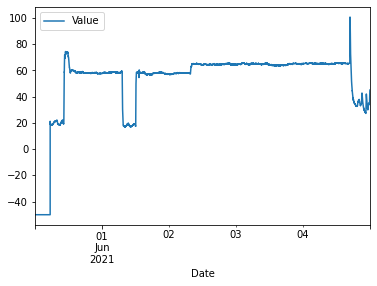

In [296]:
df3.plot();

In [297]:
tabs = pd.ExcelFile(fname).sheet_names 
print(tabs)

['AS_P113B', 'AS_PH113', 'AS_T113F', 'AS_T1131', 'AS_T1132', 'AS_T1133', 'AS_T1134', 'AS_T1135']


In [298]:
def get_data1s(fname,sheet_name):
    import pandas as pd
    df=pd.read_excel(fname,sheet_name=sheet_name)
    df.columns=["Date","Value","Status"]
    bad_data=df[df["Status"]=="Bad Data"].index
    df.drop(index=bad_data,inplace=True)
    df.dropna(inplace=True)
    df.index=df.Date
    df.set_index("Date",inplace=True)
    df.drop(columns=["Status"], inplace=True)
    dfout=df.resample("1s").mean()
    dfout.interpolate('linear',inplace=True)
    dfout=dfout.resample("10s").mean()

    return(dfout)



In [299]:
df0=get_data1s(fname,tabs[0])

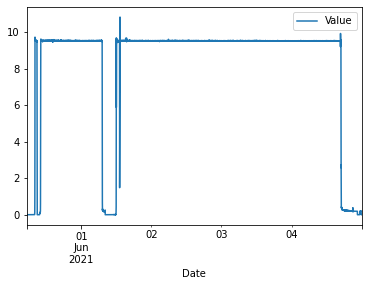

In [300]:
df0.plot();

In [301]:
df1=get_data1s(fname,tabs[1])

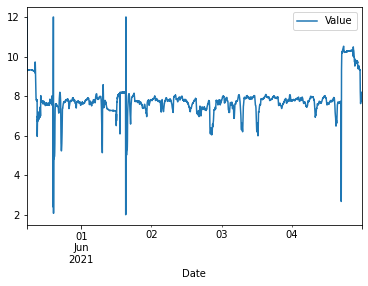

In [302]:
df1.plot();

In [303]:
df2=get_data1s(fname,tabs[2])

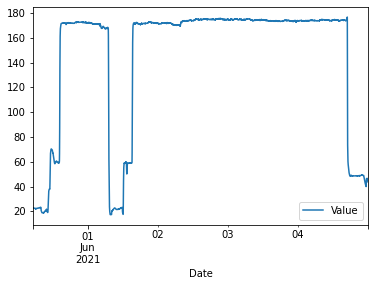

In [304]:
df2.plot()

In [305]:
df3=get_data1s(fname,tabs[3])

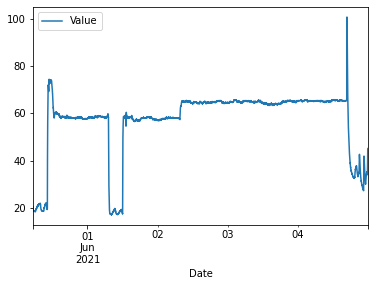

In [306]:
df3.plot()

In [307]:
def df_list(fname,tabs):
    out_df_list=[]
    for tabx in tabs:
        dftab=get_data1s(fname,tabx)
        dftab.plot()
        out_df_list.append(dftab)
    return out_df_list 

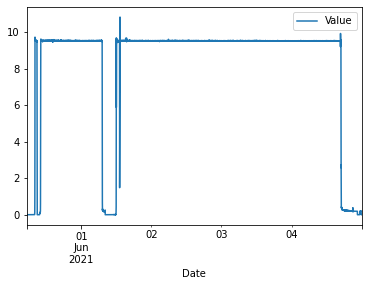

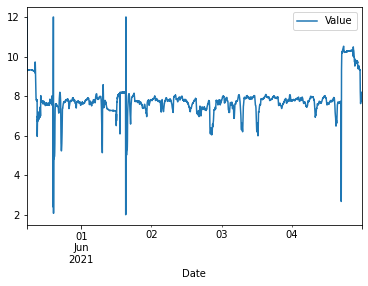

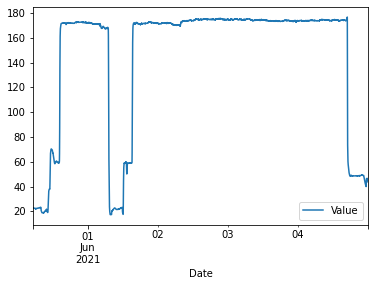

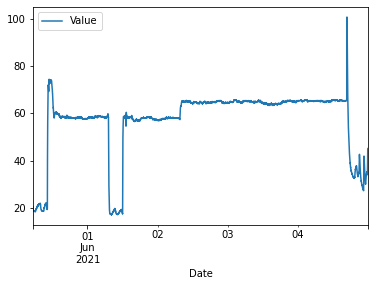

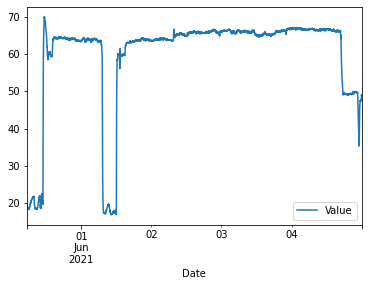

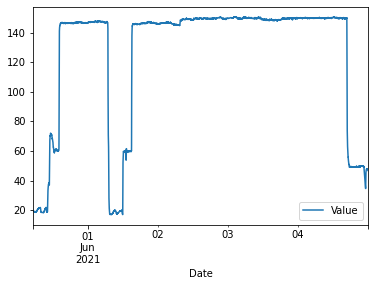

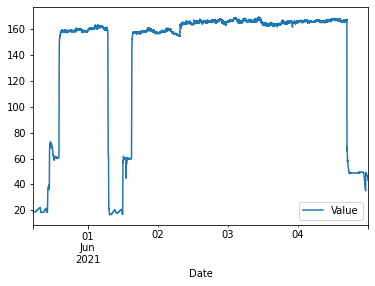

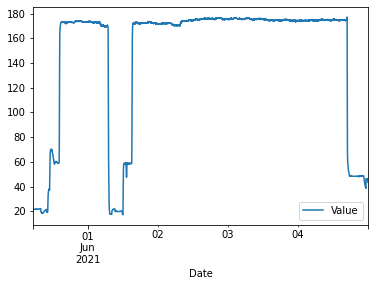

In [308]:
all_df=df_list(fname,tabs)

In [309]:
def df_concat(dflist,df_heads):
    for index,name in enumerate(df_heads):
        dflist[index].columns=[name]
    out_df=pd.concat(dflist,axis=1)
    #out_df.head=df_heads
    out_df.dropna(inplace=True)
    return(out_df)

In [310]:


allDF=df_concat(all_df,tabs)

In [311]:
all_df[0].head()

,AS_P113B
Date,
2021-05-31 05:22:30,0.0
2021-05-31 05:22:40,0.0
2021-05-31 05:22:50,0.0
2021-05-31 05:23:00,0.0
2021-05-31 05:23:10,0.0


In [312]:
allDF.head()

,AS_P113B,AS_PH113,AS_T113F,AS_T1131,AS_T1132,AS_T1133,AS_T1134,AS_T1135
Date,,,,,,,,
2021-05-31 05:22:30,0.0,12.000000,22.794204,20.529801,19.331447,19.646682,19.432781,21.872282
2021-05-31 05:22:40,0.0,12.000000,22.819313,19.329699,19.219914,19.532831,19.409681,21.872282
2021-05-31 05:22:50,0.0,12.000000,22.779431,19.275963,19.214920,19.556447,19.446373,21.872282
2021-05-31 05:23:00,0.0,12.000000,22.814145,19.275963,19.214920,19.588511,19.414435,21.872282
2021-05-31 05:23:10,0.0,11.109744,22.841612,19.275963,19.214920,19.530365,19.389166,21.872282


In [313]:
allDF.to_csv("20210621.csv",sep=";")

In [314]:
allDF.describe()

,AS_P113B,AS_PH113,AS_T113F,AS_T1131,AS_T1132,AS_T1133,AS_T1134,AS_T1135
count,41264.000000,41264.000000,41264.000000,41264.000000,41264.000000,41264.000000,41264.000000,41264.000000
mean,8.219028,7.806064,145.065446,57.155035,59.774901,125.538619,137.145718,145.670110
std,3.254134,0.801768,54.830368,13.676540,13.545340,44.874223,50.994703,55.301713
min,0.000000,2.015610,17.273212,17.116806,16.853592,16.917878,16.592661,17.209126
25%,9.526007,7.563897,170.229645,57.911423,63.481346,145.662628,156.995155,170.533675
50%,9.531872,7.758273,172.787064,63.740365,64.797440,147.637909,162.129971,173.833374
75%,9.536102,7.912216,174.325297,65.045395,66.113525,149.595642,165.863251,174.979329
max,10.832980,12.000000,176.836838,100.762955,69.948109,150.446320,169.367722,177.243179


In [315]:
# Készítsünk egy scatter plotot!
from pandas.plotting import scatter_matrix

#scatter_matrix(allDF, alpha = 0.2, figsize = (10, 10), diagonal = 'kde');

In [316]:
allDF.head()

,AS_P113B,AS_PH113,AS_T113F,AS_T1131,AS_T1132,AS_T1133,AS_T1134,AS_T1135
Date,,,,,,,,
2021-05-31 05:22:30,0.0,12.000000,22.794204,20.529801,19.331447,19.646682,19.432781,21.872282
2021-05-31 05:22:40,0.0,12.000000,22.819313,19.329699,19.219914,19.532831,19.409681,21.872282
2021-05-31 05:22:50,0.0,12.000000,22.779431,19.275963,19.214920,19.556447,19.446373,21.872282
2021-05-31 05:23:00,0.0,12.000000,22.814145,19.275963,19.214920,19.588511,19.414435,21.872282
2021-05-31 05:23:10,0.0,11.109744,22.841612,19.275963,19.214920,19.530365,19.389166,21.872282


In [320]:
l1=allDF["AS_T1134"] >165
aa=allDF.loc[l1]

In [322]:
aa.index[-1]

Timestamp('2021-06-04 16:46:00')

In [323]:
start_time =aa.index[0]    #pd.Timestamp("2021-07-06 00:00:00")
end_time   =aa.index[-1]   #pd.Timestamp("2021-07-09 00:00:00")
print(allDF.loc[start_time])
print("-"*30)
print(allDF.loc[end_time])

AS_P113B      9.538353
AS_PH113      7.846189
AS_T113F    173.614105
AS_T1131     65.140762
AS_T1132     65.137367
AS_T1133    149.001106
AS_T1134    165.049515
AS_T1135    173.797668
Name: 2021-06-02 08:35:30, dtype: float64
------------------------------
AS_P113B      9.890511
AS_PH113      7.736779
AS_T113F    174.091515
AS_T1131     66.645302
AS_T1132     66.289184
AS_T1133    143.289270
AS_T1134    165.355309
AS_T1135    174.894943
Name: 2021-06-04 16:46:00, dtype: float64


In [324]:
allDF.tail()


,AS_P113B,AS_PH113,AS_T113F,AS_T1131,AS_T1132,AS_T1133,AS_T1134,AS_T1135
Date,,,,,,,,
2021-06-04 23:59:00,0.0,7.846666,43.839169,45.029373,49.015793,46.987774,43.440529,43.508430
2021-06-04 23:59:10,0.0,7.848001,43.837643,45.041656,49.015793,46.941158,43.393409,43.472481
2021-06-04 23:59:20,0.0,7.849930,43.772030,45.084209,49.004578,46.897175,43.322468,43.434425
2021-06-04 23:59:30,0.0,7.852017,43.762875,45.115795,48.954376,46.858112,43.267719,43.401405
2021-06-04 23:59:40,0.0,7.854428,43.762875,45.117111,48.934616,46.830894,43.248341,43.381018


In [325]:
actual_df = allDF[
    (allDF.index > start_time ) &
    (allDF.index < end_time)
]

In [326]:
actual_df.head()

,AS_P113B,AS_PH113,AS_T113F,AS_T1131,AS_T1132,AS_T1133,AS_T1134,AS_T1135
Date,,,,,,,,
2021-06-02 08:35:40,9.537300,7.846189,173.614105,65.130033,65.120697,149.027809,165.122833,173.775848
2021-06-02 08:35:50,9.535323,7.846189,173.602661,65.106192,65.175095,149.042496,165.164948,173.775848
2021-06-02 08:36:00,9.530899,7.845710,173.551799,65.133705,65.175095,149.042496,165.166702,173.775848
2021-06-02 08:36:10,9.530327,7.843158,173.582316,65.214958,65.175095,149.103912,165.174332,173.775848
2021-06-02 08:36:20,9.532616,7.842680,173.591471,65.228500,65.175095,149.130234,165.238571,173.775848


In [327]:
actual_df.describe()

,AS_P113B,AS_PH113,AS_T113F,AS_T1131,AS_T1132,AS_T1133,AS_T1134,AS_T1135
count,20222.000000,20222.000000,20222.000000,20222.000000,20222.000000,20222.000000,20222.000000,20222.000000
mean,9.530682,7.639870,174.353503,64.899435,66.033662,149.490601,165.780825,175.117144
std,0.007801,0.378778,0.571436,0.487150,0.560006,0.509998,1.273749,0.691641
min,9.209423,6.001984,172.879735,63.347832,64.614326,145.469209,161.616695,173.473709
25%,9.527063,7.539460,173.903831,64.578716,65.648125,149.239906,165.105270,174.526596
50%,9.530384,7.753933,174.357185,65.013781,66.097790,149.595642,165.883118,175.012589
75%,9.534691,7.884720,174.803598,65.228500,66.491188,149.849854,166.609283,175.678078
max,9.816983,8.090474,175.679260,65.971618,67.063400,150.446320,169.367722,176.706573


In [328]:

#scatter_matrix(actual_df, alpha = 0.2, figsize = (10, 10), diagonal = 'kde');

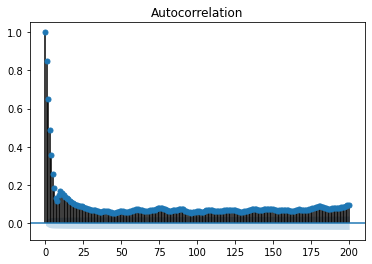

In [329]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
dta = actual_df.AS_P113B[:]
dta.index = actual_df.index[:]


sm.graphics.tsa.plot_acf(dta.values.squeeze(), lags=200)
plt.show()

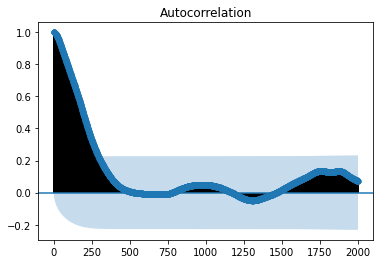

In [330]:
dta = actual_df.AS_PH113[:]
dta.index = actual_df.index[:]


sm.graphics.tsa.plot_acf(dta.values.squeeze(), lags=2000)
plt.show()

In [331]:
features=tabs
from sklearn.preprocessing import StandardScaler
x = dta = actual_df.loc[:, features].values
x = StandardScaler().fit_transform(x) # normalizing the features

In [332]:
x

array([[ 8.48360231e-01,  5.44709638e-01, -1.29396307e+00, ...,
        -9.07460310e-01, -5.16591791e-01, -1.93934179e+00],
       [ 5.94908835e-01,  5.44709638e-01, -1.31399048e+00, ...,
        -8.78662270e-01, -4.83527741e-01, -1.93934179e+00],
       [ 2.78019357e-02,  5.43446145e-01, -1.40300120e+00, ...,
        -8.78662270e-01, -4.82150072e-01, -1.93934179e+00],
       ...,
       [ 8.01706884e+00,  2.00768944e-01, -3.70365559e-01, ...,
        -3.08978171e+00, -2.37043036e-01, -4.17024473e-01],
       [ 2.34184257e+01,  2.03786312e-01, -3.91728132e-01, ...,
        -4.94784916e+00, -2.18714651e-01, -4.17024473e-01],
       [ 3.67017771e+01,  2.26487085e-01, -4.25107153e-01, ...,
        -7.88530452e+00,  4.29315981e-02, -3.92314752e-01]])

In [333]:
from sklearn.decomposition import PCA
pca_113 = PCA(n_components=2)
principal113 = pca_113.fit_transform(x)

In [334]:
principal113

array([[ 2.05406322,  1.35798434],
       [ 1.99541119,  1.43528628],
       [ 1.95950543,  1.59210578],
       ...,
       [ 1.69424397, -0.72048375],
       [ 3.44247311, -3.42630007],
       [ 5.19089529, -5.69564359]])

<Figure size 432x288 with 0 Axes>

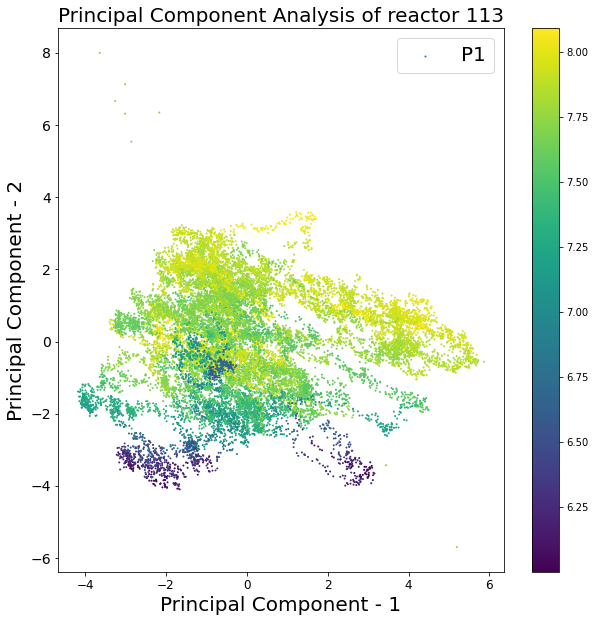

In [335]:
plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 1',fontsize=20)
plt.ylabel('Principal Component - 2',fontsize=20)
plt.title("Principal Component Analysis of reactor 113",fontsize=20)
targets = ['P1', 'P2']
colors = x[:,1]
color = actual_df.loc[:, "AS_PH113"].values
plt.scatter(principal113[:,0],principal113[:,1] , c = color, s = 1,)
plt.colorbar()
plt.legend(targets,prop={'size': 20})

In [336]:
pca_113.components_

array([[ 0.05669811,  0.12410126, -0.24984906, -0.4455713 , -0.41468222,
        -0.51279982, -0.48521977, -0.22374681],
       [-0.16881878,  0.46499192, -0.54505058,  0.2314624 ,  0.31417917,
         0.08605855,  0.05835354, -0.54323843]])

array([[ 0.01670607,  0.05312135, -0.40868632, -0.44066814, -0.42976667,
        -0.43431946, -0.4122653 , -0.3039583 ],
       [ 0.21560599, -0.70138045,  0.17989372, -0.16032836, -0.24443999,
        -0.22447836,  0.00337312,  0.54162695]])

In [337]:
print(pca_113)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)


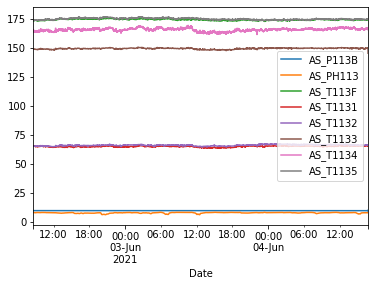

In [338]:
actual_df.plot()

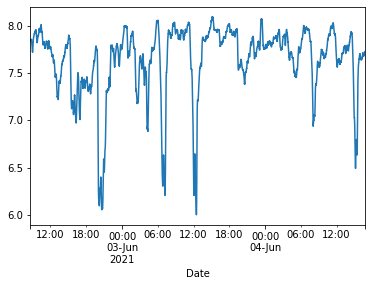

In [339]:
actual_df.AS_PH113.plot()

In [340]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler


In [341]:
db=DBSCAN(eps=0.5,).fit(x)

In [342]:
print(db.labels_)
print(max(db.labels_))

[ 0  0  0 ... -1 -1 -1]
34


In [343]:
!rm alma*

rm: cannot remove 'alma*': No such file or directory


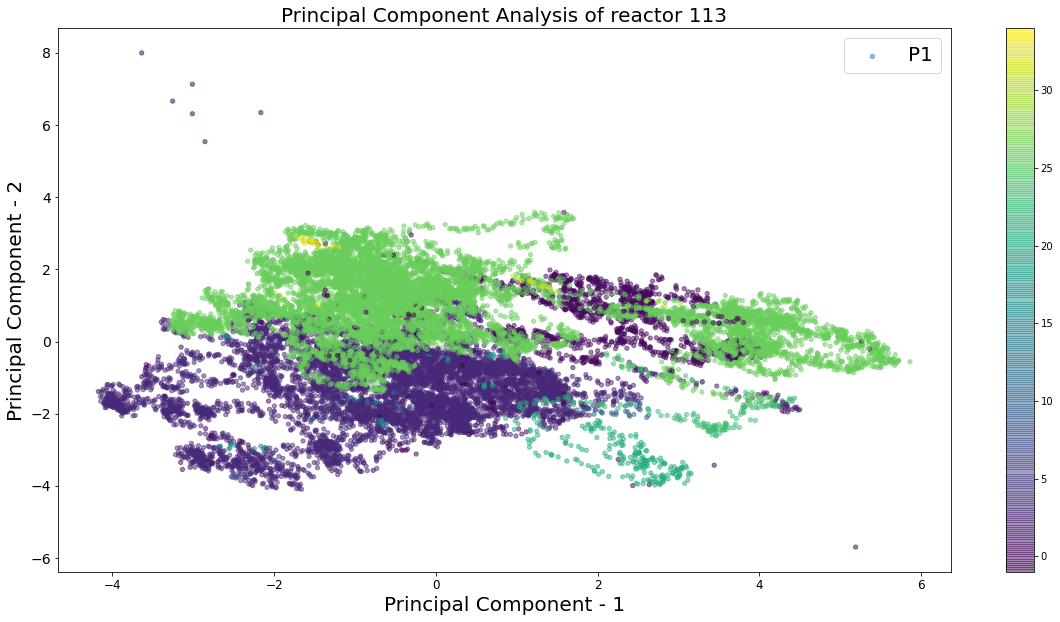

In [344]:

fig=plt.figure(figsize=(20,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 1',fontsize=20)
plt.ylabel('Principal Component - 2',fontsize=20)
plt.title("Principal Component Analysis of reactor 113",fontsize=20)
targets = ['P1', 'P2']
colors = x[:,1]
color = db.labels_
plt.scatter(principal113[:,0],principal113[:,1] , c = color, s = 18,alpha=0.5,marker="o",)
plt.colorbar()
plt.legend(targets,prop={'size': 20})
plt.show()
fig.savefig(fname+".png")

In [345]:
import plotly.express as px

In [346]:
fig=px.scatter(x=principal113[:,0],y=principal113[:,1],color=db.labels_,)

In [347]:
fig.show()